In [53]:
  
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '30ae6c60-cc64-4a87-856a-47d255018152',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2023-09-23T23:44:55.930Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9104}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10476, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [54]:
import pandas as pd

In [55]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19494056.00000,19494056.00000,...,49.13050,558123512044.31995,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364
1,1027,Ethereum,ETH,ethereum,7430,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120228897.04677,120228897.04677,...,18.16120,191516539154.95001,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364
2,825,Tether USDt,USDT,tether,62728,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83201358999.17218,86426198726.43625,...,7.89180,86440846978.78000,None,2023-09-23T23:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 02:45:02.467364
3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847454.12379,153847454.12379,...,3.07200,32392638469.19000,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,...,2.56400,50780025291.20000,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364
5,3408,USD Coin,USDC,usd-coin,14206,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25772118533.82790,25772118533.82790,...,2.44410,25774293689.09000,None,2023-09-23T23:43:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 02:45:02.467364
6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141130216383.70526,141130216383.70526,...,0.82300,8678335675.17000,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118380000.19900,36198584811.42400,...,0.81930,11071513134.73000,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,412611213.87605,558106763.91800,...,0.76180,10866009898.87000,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364
9,11419,Toncoin,TON,toncoin,150,2021-08-26T13:40:22.000Z,"[pos, ftx-bankruptcy-estate, dwf-labs-portfoli...",NaN,3431892087.62000,5047558528.00000,...,0.74890,11614095946.10000,None,2023-09-23T23:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 02:45:02.467364


In [56]:


def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start': '1',
      'limit': '15',
      'convert': 'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '30ae6c60-cc64-4a87-856a-47d255018152',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)

    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
     # Calculate percentage changes
    df['1h%'] = df['quote.USD.percent_change_1h']
    df['24h%'] = df['quote.USD.percent_change_24h']
    df['7d%'] = df['quote.USD.percent_change_7d']
    df['30d%'] = df['quote.USD.percent_change_30d']
    df['60d%'] = df['quote.USD.percent_change_60d']
    df['90d%'] = df['quote.USD.percent_change_90d']
    
    if not os.path.isfile(r'C:/Users/zainab/Downloads/Python Scripts/API.csv'):
        df.to_csv(r'C:/Users/zainab/Downloads/Python Scripts/API.csv', header='colum_names')
    else:
       df.to_csv(r'C:/Users/zainab/Downloads/Python Scripts/API.csv', mode='a', header=False)
    

In [57]:
import os
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep in 1 minute
exit()


API Runner completed
API Runner completed


KeyboardInterrupt: 

In [58]:
df72=pd.read_csv(r'C:/Users/zainab/Downloads/Python Scripts/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,platform.symbol,platform.slug,platform.token_address,timestamp,1h%,24h%,7d%,30d%,60d%,90d%
0,0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19494056.00000,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,0.00869,-0.04298,0.08864,1.73136,-9.05340,-12.72992
1,1,1027,Ethereum,ETH,ethereum,7430,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120228897.04677,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,0.07012,-0.08202,-2.56254,-3.74984,-14.23105,-16.13755
2,2,825,Tether USDt,USDT,tether,62728,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83201358999.17218,...,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 02:45:21.454691,0.00412,0.01417,-0.00790,0.01761,0.01545,-0.02179
3,3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847454.12379,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,0.07928,-0.32423,-1.97358,-3.40541,-11.44332,-11.76904
4,4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53245240268.00000,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,-0.17016,-1.00868,1.63362,-1.90487,-28.57190,3.60468
5,5,3408,USD Coin,USDC,usd-coin,14206,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25772118533.82790,...,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 02:45:21.454691,-0.00291,-0.00170,-0.00441,-0.01413,-0.00881,0.01007
6,6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141130216383.70526,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,0.04463,-0.08209,-1.00776,-2.34926,-24.68579,-7.87895
7,7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35118380000.19900,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,0.01501,0.44468,-1.60570,-7.29802,-19.05927,-15.81485
8,8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,412611213.87605,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,0.17036,0.00951,1.80164,-7.07076,-16.14661,14.83401
9,9,11419,Toncoin,TON,toncoin,150,2021-08-26T13:40:22.000Z,"['pos', 'ftx-bankruptcy-estate', 'dwf-labs-por...",NaN,3431892087.62000,...,NaN,NaN,NaN,2023-09-24 02:45:21.454691,0.23739,0.12573,-4.24096,62.99545,61.35564,55.63680


In [59]:
pd.set_option('display.float_format',lambda x:'%.5f' % x)

In [60]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,platform.symbol,platform.slug,platform.token_address,timestamp,1h%,24h%,7d%,30d%,60d%,90d%
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19494056.00000,19494056.00000,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,-0.00361,-0.04537,0.08526,1.70238,-9.06325,-12.71165
1,1027,Ethereum,ETH,ethereum,7430,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120228897.04677,120228897.04677,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,0.05435,-0.08484,-2.56525,-3.76018,-14.23238,-16.11642
2,825,Tether USDt,USDT,tether,62728,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83201358999.17218,86426198726.43625,...,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 02:46:22.624826,0.00558,0.01642,-0.00469,0.05742,0.01139,-0.01748
3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847454.12379,153847454.12379,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,0.08196,-0.31417,-1.96369,-3.40226,-11.42599,-11.73773
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,-0.17211,-1.00866,1.62567,-1.91237,-28.56628,3.61791
5,3408,USD Coin,USDC,usd-coin,14206,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25772118533.82790,25772118533.82790,...,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 02:46:22.624826,0.00254,-0.00701,-0.00532,-0.00463,-0.01581,0.00648
6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141130216383.70526,141130216383.70526,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,0.03837,-0.08537,-1.01683,-2.35772,-24.68969,-7.87182
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118380000.19900,36198584811.42400,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,0.01426,0.43786,-1.60679,-7.30264,-19.05668,-15.81208
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,412611213.87605,558106763.91800,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,0.16482,0.01483,1.79876,-7.08225,-16.14594,14.84452
9,11419,Toncoin,TON,toncoin,150,2021-08-26T13:40:22.000Z,"[pos, ftx-bankruptcy-estate, dwf-labs-portfoli...",NaN,3431892087.62000,5047558528.00000,...,NaN,NaN,NaN,2023-09-24 02:46:22.624826,0.23767,0.12816,-4.19653,62.99100,61.33720,55.75340


In [61]:
df3= df.groupby('name',sort = False)[['1h%','24h%','7d%','30d%','60d%','90d%']].mean()
df3

,1h%,24h%,7d%,30d%,60d%,90d%
name,,,,,,
Bitcoin,-0.00361,-0.04537,0.08526,1.70238,-9.06325,-12.71165
Ethereum,0.05435,-0.08484,-2.56525,-3.76018,-14.23238,-16.11642
Tether USDt,0.00558,0.01642,-0.00469,0.05742,0.01139,-0.01748
BNB,0.08196,-0.31417,-1.96369,-3.40226,-11.42599,-11.73773
XRP,-0.17211,-1.00866,1.62567,-1.91237,-28.56628,3.61791
USD Coin,0.00254,-0.00701,-0.00532,-0.00463,-0.01581,0.00648
Dogecoin,0.03837,-0.08537,-1.01683,-2.35772,-24.68969,-7.87182
Cardano,0.01426,0.43786,-1.60679,-7.30264,-19.05668,-15.81208
Solana,0.16482,0.01483,1.79876,-7.08225,-16.14594,14.84452


In [62]:
df4 = df3.stack()
df4

name          
Bitcoin   1h%     -0.00361
          24h%    -0.04537
          7d%      0.08526
          30d%     1.70238
          60d%    -9.06325
                    ...   
Litecoin  24h%     1.11704
          7d%     -0.26868
          30d%     0.48810
          60d%   -27.33035
          90d%   -26.17771
Length: 90, dtype: float64

In [64]:
type(df4)

pandas.core.series.Series

In [65]:
df5 = df4.to_frame(name='values')
df5

values
name                   
Bitcoin  1h%   -0.00361
         24h%  -0.04537
         7d%    0.08526
         30d%   1.70238
         60d%  -9.06325
...                 ...
Litecoin 24h%   1.11704
         7d%   -0.26868
         30d%   0.48810
         60d% -27.33035
         90d% -26.17771

[90 rows x 1 columns]

In [66]:
type(df5)

pandas.core.frame.DataFrame

In [69]:
index= pd.Index(range(90))
df6= df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,1h%,-0.00361
1,Bitcoin,24h%,-0.04537
2,Bitcoin,7d%,0.08526
3,Bitcoin,30d%,1.70238
4,Bitcoin,60d%,-9.06325
...,...,...,...
85,Litecoin,24h%,1.11704
86,Litecoin,7d%,-0.26868
87,Litecoin,30d%,0.48810
88,Litecoin,60d%,-27.33035


In [74]:
df7 = df6.rename(columns={'level_1': 'Percent_change'})
df7

,name,Percent_change,values
0,Bitcoin,1h%,-0.00361
1,Bitcoin,24h%,-0.04537
2,Bitcoin,7d%,0.08526
3,Bitcoin,30d%,1.70238
4,Bitcoin,60d%,-9.06325
...,...,...,...
85,Litecoin,24h%,1.11704
86,Litecoin,7d%,-0.26868
87,Litecoin,30d%,0.48810
88,Litecoin,60d%,-27.33035


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


c:\Users\zainab\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


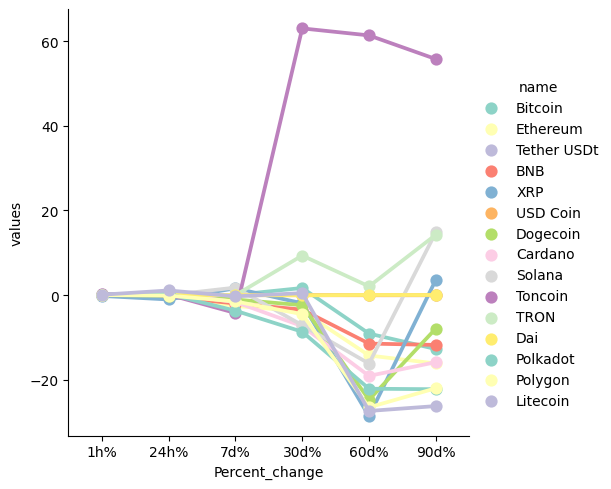

In [80]:

# Define a custom color palette with distinct colors
custom_palette = sns.color_palette("Set3", len(df7['name'].unique()))

# Create the catplot using the custom color palette
sns.catplot(x='Percent_change', y='values', hue='name', data=df7, kind='point', palette=custom_palette)